
<img src="pexels-jeetesh-nath-728411.jpg" alt="Drawing" style="width: 800px;"/>

# A Data Driven Approach to European Ski Resorts - Pandas

[Part 1](https://nbviewer.org/github/nembdev/python_portfolio/blob/main/Data%20Analysis%20Projects/European%20Ski%20Resorts%28Manual%29/A%20Data%20Driven%20Approach%20to%20European%20Ski%20Resorts.ipynb)

Previously, we tried a tool/library-less approach to Data Analysis. While manual analysis is tedious and limits our scope, its always a good idea to practice the fundamentals.

Now we will use the full might of Pandas, and Seaborn to go further in depth.

Pandas will handle our analysis, while Seaborn will help us create our Visuals. 


## Our Dataset

Our dataset features a sample of 376 European ski resorts provided by  ski-resort-stats.com, made available through Kaggle.

[Kaggle Dataset](https://www.kaggle.com/thomasnibb/european-ski-resorts)

[Data Source: Ski-resort-stats.com](Ski-resort-stats.com)

## Avenues of Exploration

1. [Initial Exploration](#exp)
2.  [Resort Countries](#count)
3. [Top 5 Most Represented Countries](#top5)
4. [Average Adult day pass price](#avgprice)
5. [Comparison of Price to Available Difficulty](#dif)
6. [Comparison of Price to Elevation](#elev)

# Data Dictionary

|Column Name| Description|
|-----------|-----------|
|**#**|Rownumber|
|**Resort**|The name of the ski & snowboard resort.|
|**Country**| The name of the country in which the resort is located.|
|**HighestPoint**|The highest mountain point at the ski resort.|
|**LowestPoint**|The lowest possible point at the ski resort.|
|**DayPassPriceAdult**| The price shows what it costs for 1 adult for 1 day in Euros €.|
|**BeginnerSlope**|The total amount of “beginner” slopes at the resort. “Beginner slopes” contain “children”, “blue” and “green” slopes.|
|**IntermediateSlope**| The total amount of “intermediate” slopes at the resort.“Intermediate slopes” contains “red” slopes. |
|**DifficultSlope**| The total amount of “difficult” slopes at the resort.“Difficult slopes” contains “black”, “advanced” and”expert” slopes.| 
|**TotalSlope**| The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes”|
|**Snowparks**| Does the resort have one or more snowparks?|
|**NightSki**|Does the resort offer skiing on an illuminated slope?|
|**SurfaceLifts**| The amount of lifts in these categories: T-bar, Sunkids lift, Rope lifts and people mower.|
|**ChairLifts**| The total amount of chairlifts.|
|**GondolaLifts**|The amount of lifts in these categories: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats and Aerial tramways.|
|**TotalLifts**| The sum of “surface lifts” + “gondola etc” + “chairlifts”|
|**LiftCapacity**| How many passengers can the lift system at the ski resort move in one hour?|
|**SnowCannons**| The total amount of snow cannons at the ski resort.|

## Library Imports

Here we import our industry standard tools

* NumPy
* Pandas
* Seaborn
* Matplotlib

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns


# additional parameters
%matplotlib inline
style.use("ggplot")
plt.rcParams["figure.figsize"] = [10, 10]
font = {"size": 24}

plt.rc("font", **font)

sns.set_theme()

## Importing our data with Corrections

After importing our csv, we found out that our first column header is blank. 

It should be labeled as '#' for the row number.

By providing an array of header names to our read_csv method, we can correct this on import. 

We then load our csv and transform it into a Pandas DataFrame.

In [2]:
ski_data = pd.read_csv(
    "European_Ski_Resorts.csv",
    names=[
        "#",
        "resort",
        "country",
        "highest_point",
        "lowest_point",
        "daypass_price_adult",
        "beginner_slope",
        "intermediate_slope",
        "difficult_slope",
        "total_slope",
        "snowparks",
        "night_ski",
        "surface_lifts",
        "chair_lifts",
        "gondola_lifts",
        "total_lifts",
        "lift_capacity",
        "snow_cannons",
    ],
    skiprows=1,
    index_col=0,
)

<a id="exp"><a>

## Initial Exploration

In [3]:
ski_data

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
373,Sauze d’Oulx (Via Lattea),Italy,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655


### Data Types 

Here we have each columns data-type.

In comparison to our manual analysis, Pandas has automatically converted each column to the proper type.

In [4]:
print(ski_data.dtypes)
print("Shape: ", ski_data.shape)

resort                 object
country                object
highest_point           int64
lowest_point            int64
daypass_price_adult     int64
beginner_slope          int64
intermediate_slope      int64
difficult_slope         int64
total_slope             int64
snowparks              object
night_ski              object
surface_lifts           int64
chair_lifts             int64
gondola_lifts           int64
total_lifts             int64
lift_capacity           int64
snow_cannons            int64
dtype: object
Shape:  (376, 17)


## Head & Tail

A quick summary of our first 10 and last 10 data-points.

In [5]:
ski_data.head()

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [6]:
ski_data.tail()

,resort,country,highest_point,lowest_point,daypass_price_adult,beginner_slope,intermediate_slope,difficult_slope,total_slope,snowparks,night_ski,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
#,,,,,,,,,,,,,,,,,
372,Montgenèvre (Via Lattea),France,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
373,Sauze d’Oulx (Via Lattea),Italy,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655
375,Champoluc (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655
376,Zauchensee,Austria,2188,1000,52,23,16,4,44,Yes,No,9,6,4,19,25988,113


## New information

We have **2 Data Types**
    * Integers
    * Strings(objects)
    
All expected values are present i.e no missing values - **376 non-null** values
* 376 Rows x 18 Columns 

In [7]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 1 to 376
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   resort               376 non-null    object
 1   country              376 non-null    object
 2   highest_point        376 non-null    int64 
 3   lowest_point         376 non-null    int64 
 4   daypass_price_adult  376 non-null    int64 
 5   beginner_slope       376 non-null    int64 
 6   intermediate_slope   376 non-null    int64 
 7   difficult_slope      376 non-null    int64 
 8   total_slope          376 non-null    int64 
 9   snowparks            376 non-null    object
 10  night_ski            376 non-null    object
 11  surface_lifts        376 non-null    int64 
 12  chair_lifts          376 non-null    int64 
 13  gondola_lifts        376 non-null    int64 
 14  total_lifts          376 non-null    int64 
 15  lift_capacity        376 non-null    int64 
 16  snow_can

## Basic Statistical Summary

Using our describe method we can extract a few statistics such as **means, mins, and averages**.

For example, the **mean price** of an **Adult Day Pass** is about **40 Euros**.

In [8]:
ski_data.describe()

,highest_point,lowest_point,daypass_price_adult,beginner_slope,intermediate_slope,difficult_slope,total_slope,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,snow_cannons
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,2051.688830,1055.098404,40.779255,35.869681,38.348404,11.776596,86.257979,13.662234,9.340426,3.954787,26.957447,34727.244681,218.361702
std,776.719908,423.604310,12.474259,53.719832,49.691136,17.785780,113.740218,14.438661,12.595282,6.565411,31.038957,45955.042689,406.903529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1550.000000,779.250000,34.000000,8.000000,9.000000,2.000000,25.000000,5.000000,2.000000,0.000000,10.000000,10642.500000,0.000000
50%,2104.000000,1050.000000,42.000000,19.000000,22.000000,5.000000,48.000000,9.000000,5.000000,2.000000,17.000000,19031.500000,54.000000
75%,2567.500000,1350.000000,49.000000,40.000000,42.250000,13.000000,100.000000,17.000000,10.000000,5.000000,29.250000,36555.500000,252.000000
max,3899.000000,2180.000000,81.000000,312.000000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,252280.000000,2383.000000


<a id="count"><a>

# What countries are we working with?

Its often helpful to group your information into various categories.

First we'll find out what unique countries are represented in our data.

Then we can extract the top **5 represented countries** based on number of resorts. We can express this visually with a bar chart.

Finally, we can sum up this information using a handy pie chart.

In [9]:
# Unique Countries
print(ski_data["country"].unique())

['Austria' 'Andorra' 'Southern Russia' 'Poland' 'Bulgaria'
 'Bosnia and Herzegovina' 'Slovenia' 'France' 'Switzerland' 'Germany'
 'Spain' 'Italy' 'Sweden' 'Norway' 'Ukraine' 'Finland' 'Serbia' 'Slovakia'
 'Siberia' 'Czech Republic' 'Romania' 'Greece' 'United Kingdom'
 'Liechtenstein' 'Lithuania' 'Denmark' 'Netherlands']


In [10]:
# Number of Resorts per Country
print("Total Countries: ", ski_data["country"].value_counts().count())
ski_data["country"].value_counts()

Total Countries:  27


Austria                   89
France                    83
Switzerland               61
Italy                     44
Germany                   24
Norway                    10
Spain                      8
Denmark                    8
Sweden                     6
Andorra                    5
Slovakia                   5
Slovenia                   4
United Kingdom             4
Bulgaria                   4
Southern Russia            4
Finland                    3
Poland                     2
Czech Republic             2
Romania                    2
Lithuania                  1
Liechtenstein              1
Serbia                     1
Greece                     1
Siberia                    1
Bosnia and Herzegovina     1
Ukraine                    1
Netherlands                1
Name: country, dtype: int64

<a id="top5"><a>

## Top 5 Countries by number of resorts

Our dataset contains 27 unique European countries. 

As there are "44 countries in Europe,... according to the United Nations", about 60% of European Countries contain a ski resort.

Now we can separate the top 5 countries with the most ski resorts, and chart what percentage they represent of our entire dataset.

We will combine our non top 5 into an "Other" Category to simplify our chart.

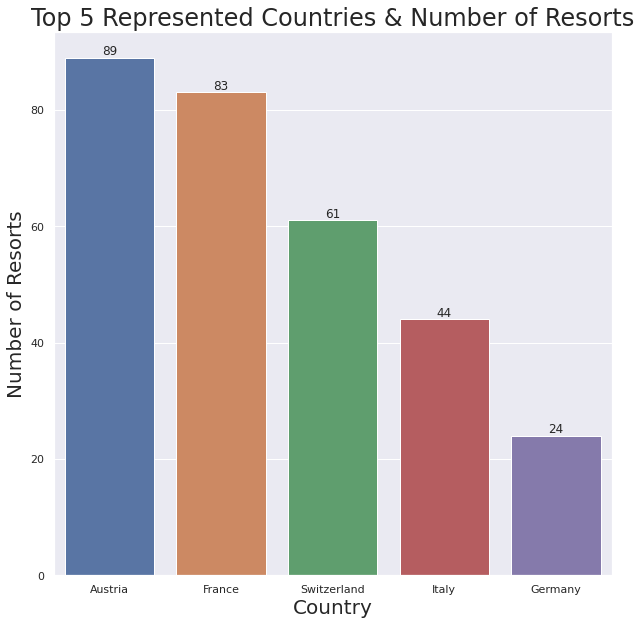

In [11]:
# counts holds our value_counts
# convert country value counts to a dataframe, using walrus operator
(counts := ski_data["country"].value_counts().to_frame().reset_index()).rename(
    columns={"index": "country", "country": "num_resorts"}, inplace=True
)

fig, ax = plt.subplots()

# ax = plt.bar(x=counts["country"][0:5], height=counts["num_resorts"][0:5])

sns.barplot(ax=ax, data=counts,
            x=counts["country"][0:5], y=counts["num_resorts"][0:5])

ax.set_title("Top 5 Represented Countries & Number of Resorts", size=24)
ax.set_xlabel("Country", size=20)
ax.set_ylabel("Number of Resorts", size=20)

for i in ax.containers:
    ax.bar_label(
        i,
    )

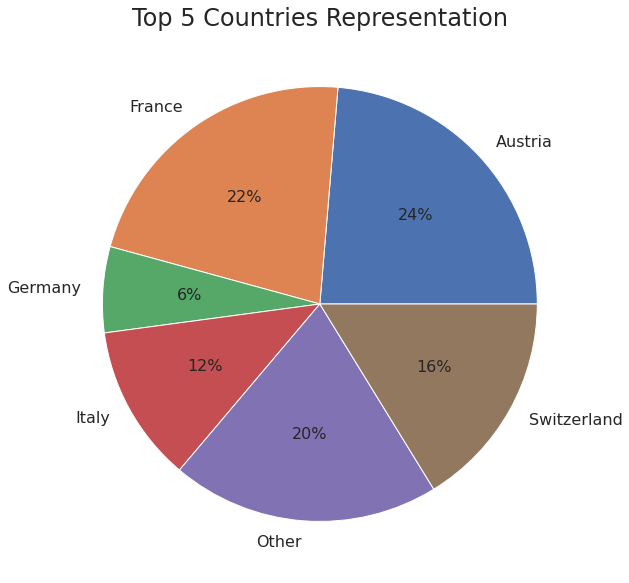

In [12]:
# setup 1

# create a deep copy
oth_counts = counts.copy(deep=True)
# convert anything not top into "Other" Label
oth_counts.loc[oth_counts["num_resorts"] <= 10, "country"] = "Other"

oth_counts = oth_counts.groupby("country").sum().reset_index()

# setup 2

fig, ax = plt.subplots()

# styling
colors = sns.color_palette("deep")

# pie chart
ax = plt.pie(
    x=oth_counts["num_resorts"],
    data=oth_counts,
    labels=oth_counts["country"],
    colors=colors,
    autopct="%0.0f%%",
    textprops={"fontsize": 16},
)

plt.title("Top 5 Countries Representation", size=24)

plt.show()

<a id="avgprice"><a>

# Average Adult Day Pass Price per Country



Pricing information is useful when you're playing out a vacation on a budget. The number one pricing factor is always going to be the price of the ticket itself.

Out dataset includes the **Adult Day pass price** for each resort, priced in **Euros**.

Using this we can find the average price of an adult ticket per country. 

Later we can compare this information to each countries resort offerings.

This will help us find out where we can get the most bang for our Euro.

## Questions: 

1. What country is the cheapest to ski in on average?
2. What country is the most expensive to ski in on average?

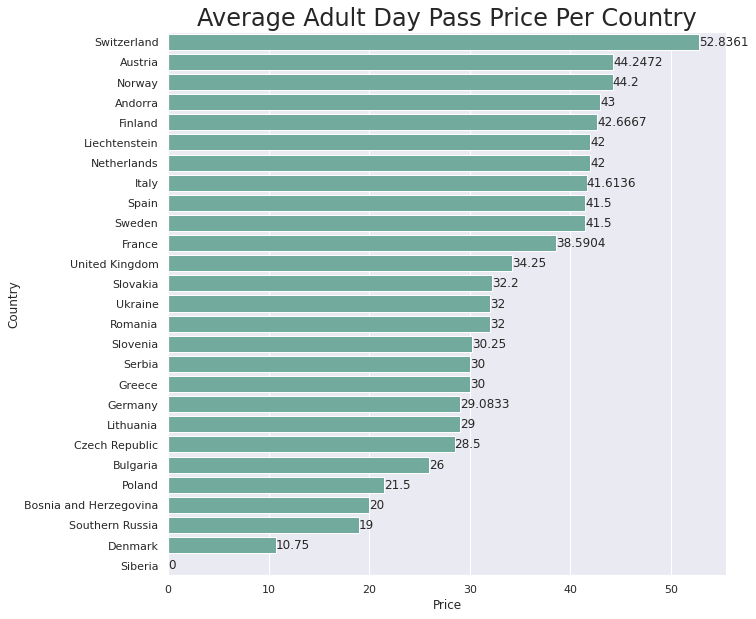

In [13]:
# dict for our results
avg_price_by_country = {}

# list of all unique countries in our data
countries = ski_data["country"].unique()

# loop through each in our list
for country in countries:
    # if the rows matches a country in our list
    # grabs all matching rows
    country_row = ski_data[ski_data["country"] == country]

    # calculate the the mean
    mean = country_row["daypass_price_adult"].mean()

    # add the min to our results
    avg_price_by_country[country] = mean

# sorted price
avg_price_by_country = sorted(
    avg_price_by_country.items(), key=lambda x: x[1], reverse=True
)

# convert and verify
price_country = pd.DataFrame.from_dict(avg_price_by_country)
price_country.columns = ["Country", "Price"]
# price_country


# seaborn visual
# container, plot
fig, ax = plt.subplots()

# bar graph
ax = sns.barplot(
    ax=ax,
    x=price_country["Price"],
    y=price_country["Country"],
    data=price_country,
    color="#69b3a2",
)

ax.set_title("Average Adult Day Pass Price Per Country", size=24)

# add values
for i in ax.containers:
    ax.bar_label(
        i,
    )

## Pricing Questions - Average

### Most Expensive Country: Switzerland - € 52.84

> The skiing in Switzerland is truly world-class—the country is home to some of the best, and most famous ski resorts in the world

"Switzerland is practically synonymous with the swish of skis—as the first place in Europe to develop winter tourism, the country's skiing tradition is long and storied. A long ski season, terrific snow conditions, and large, well-developed resort areas make Switzerland a bucket-list destination for skiers from around the world. A comprehensive transit system of trains, funiculars, cogwheel rails, ski gondolas, and cable cars connect thousands of miles of ski pistes, some of which even cross into Italy, France, Austria, and Germany." - [Source](https://www.tripsavvy.com/guide-to-skiing-in-switzerland-5207750)

### Cheapest Country: Denmark - € 10.75

> Futuristic, unparalleled ski slope and recreational hill on top of a new resource handling centre.

"Spectacular and innovative in the true sense of the words. That’s CopenHill. The artificial skiing slope and the recreational hiking area opened in fall 2019, built on top of the new waste management center. This sounds like something out of a sci-fi fantasy but is a reality since the power plant opened in 2017 under the name ARC (Amager Ressource Center)." - [Source](https://www.visitcopenhagen.com/copenhagen/planning/copenhill-gdk1088237)

### Outlier: Siberia € 0



> Sheregesh is the largest ski resort in Siberia and the most visited in Russia!

"Sheregesh is a huge ski region, which sprang up in the Kemerovo region (300 kilometers, or 186 miles, from the Mongolia-Kazakhstan borders) in just 15 years. For a long time, the Siberian resort even had more visitors than Krasnaya Polyana, which was a venue for the Sochi 2014 Olympics. Yet it has never welcomed the Olympics, nor benefited from multi-billion dollar government investments. What it does have is snow — so unique and of such quality that it cannot be found even in the Alps.
Reviving old mining towns is an acute problem for many countries, even developed ones. A depressive atmosphere and poverty reign there. Former miners are considered to be inert and rigid, finding it difficult to change. 

In this context, when Russian miners — who started skiing down artificial hills of spent ore, then turned them in a real ski resort — it broke all stereotypes." [Source](https://www.rbth.com/politics_and_society/society/2015/12/18/sheregesh-from-iron-ore-mining-to-alpine-skiing_552205)

<a id="dif"><a>

## Comparison of Price to Available Difficulty

How does ticket price correlate with available slope difficulties?

Text(0.5, 0.98, 'Price:Slope Options')

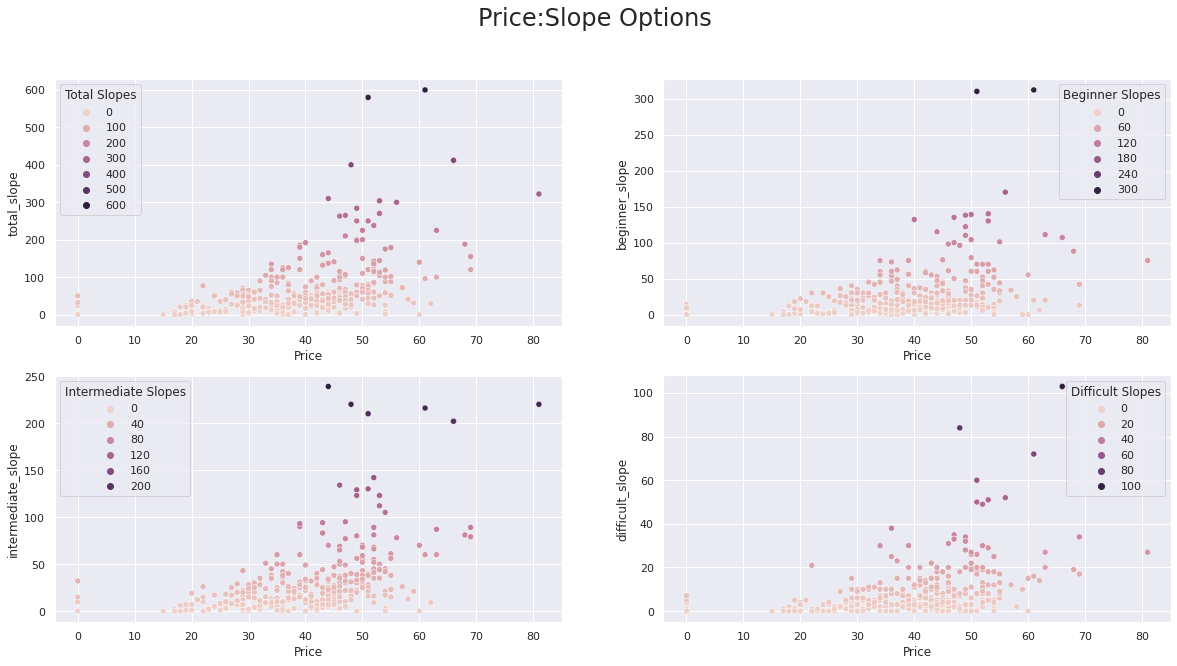

In [14]:
# extract slopes + price
ski_price_dif = ski_data[
    [
        "beginner_slope",
        "intermediate_slope",
        "difficult_slope",
        "total_slope",
        "daypass_price_adult",
    ]
].copy(deep=True)
ski_price_dif

# hstacked ax
sns.set(rc={"figure.figsize": (20, 10)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# scatter plots
ax1 = sns.scatterplot(
    ax=ax1,
    data=ski_price_dif,
    x=ski_price_dif["daypass_price_adult"],
    y=ski_price_dif["total_slope"],
    hue=ski_price_dif["total_slope"],
)

ax2 = sns.scatterplot(
    ax=ax2,
    data=ski_price_dif,
    x=ski_price_dif["daypass_price_adult"],
    y=ski_price_dif["beginner_slope"],
    hue=ski_price_dif["beginner_slope"],
)

ax3 = sns.scatterplot(
    ax=ax3,
    data=ski_price_dif,
    x=ski_price_dif["daypass_price_adult"],
    y=ski_price_dif["intermediate_slope"],
    hue=ski_price_dif["intermediate_slope"],
)

ax4 = sns.scatterplot(
    ax=ax4,
    data=ski_price_dif,
    x=ski_price_dif["daypass_price_adult"],
    y=ski_price_dif["difficult_slope"],
    hue=ski_price_dif["difficult_slope"],
)

# set titles
ax1.legend(title="Total Slopes")
ax2.legend(title="Beginner Slopes")
ax3.legend(title="Intermediate Slopes")
ax4.legend(title="Difficult Slopes")

ax1.set_xlabel("Price")
ax2.set_xlabel("Price")
ax3.set_xlabel("Price")
ax4.set_xlabel("Price")

fig.suptitle("Price:Slope Options", size=24)

## Price:Options Findings

As one would expect a higher ticket price results in a higher amount of slope options.

Our scatter plots show the most dense groupings in the **€30-€55 range**.

Anything past €55 doesn't automatically equal an increase in options.

There are a few outliers that offer over 300+ total slopes, with one resort at the extreme end of 600+.

<a id="elev"><a>

## Price:Elevation

Next we'll compare ticket price to the highest available mountain elevation.

Text(0.5, 1.0, 'Price:Highest Elevation')

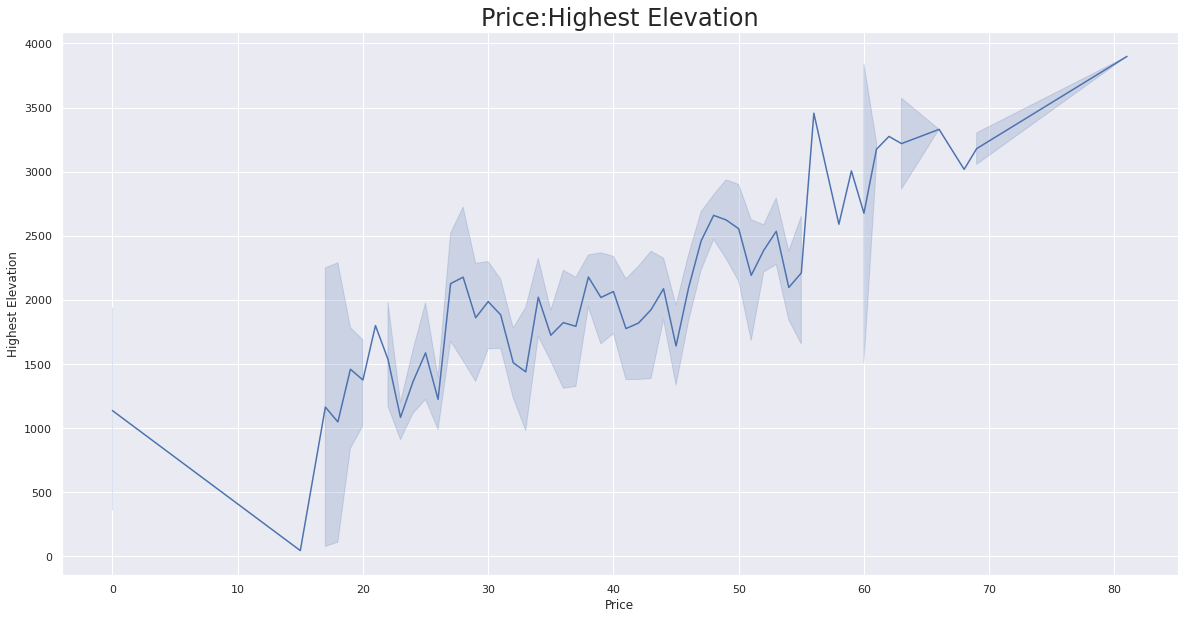

In [15]:
# setup
fig, ax = plt.subplots()

# line plot for comparison
sns.lineplot(
    data=ski_data, y=ski_data["highest_point"], x=ski_data["daypass_price_adult"]
)

# labels and title
ax.set_xlabel("Price")
ax.set_ylabel("Highest Elevation")
ax.set_title("Price:Highest Elevation", size=24)

# Conclusion

## Average Ticket Price

The average adult day pass price across Europe is 40 €.

## Top Countries with the Most Resorts

27/44 European countries contain ski resorts.

* Austria
* France
* Germany
* Italy
* Switzerland

# Bang for your Euro

Most Expensive: Switzerland

Cheapest: Denmark

Outlier: Siberia

## Price To Offerings

A ticket purchase of €40-€55 offers anywhere from 30 to 300 total slopes.

While available elevation increases directly in relation to ticket price.

You have to pay to reach the loftiest heights!